# Your first deep neural network

# imports

In [22]:
import numpy as np
import matplotlib.pyplot as plt

from keras.layers import Input, Flatten, Dense, Conv2D
from keras.models import Model, Sequential
from keras.optimizers import Adam
from keras.utils import to_categorical

from keras.datasets import cifar10

# data

In [2]:
NUM_CLASSES = 10

In [11]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [12]:
len(y_train), len(y_test)

(50000, 10000)

In [13]:
x_train.shape, x_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [17]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

y_train = to_categorical(y_train, NUM_CLASSES)
y_test = to_categorical(y_test, NUM_CLASSES)

In [21]:
y_train.shape, y_test.shape

((50000, 10), (10000, 10))

In [18]:
x_train[54, 12, 13, 1] 

0.36862746

# architecture

In [27]:
input_layer = Input((32,32,3))

x = Flatten()(input_layer)

x = Dense(200, activation = 'relu')(x)
x = Dense(150, activation = 'relu')(x)

output_layer = Dense(NUM_CLASSES, activation = 'softmax')(x)

model = Model(input_layer, output_layer)

In [30]:
model_2= Sequential([
    Dense(200, activation='relu', input_shape = (32, 32, 3)),
    Flatten(),
    Dense(150, activation='relu'),
    Dense(10, activation = 'softmax')

])

In [28]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 flatten_2 (Flatten)         (None, 3072)              0         
                                                                 
 dense_6 (Dense)             (None, 200)               614600    
                                                                 
 dense_7 (Dense)             (None, 150)               30150     
                                                                 
 dense_8 (Dense)             (None, 10)                1510      
                                                                 
Total params: 646,260
Trainable params: 646,260
Non-trainable params: 0
_________________________________________________________________


In [31]:
model_2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 32, 32, 200)       800       
                                                                 
 flatten_3 (Flatten)         (None, 204800)            0         
                                                                 
 dense_10 (Dense)            (None, 150)               30720150  
                                                                 
 dense_11 (Dense)            (None, 10)                1510      
                                                                 
Total params: 30,722,460
Trainable params: 30,722,460
Non-trainable params: 0
_________________________________________________________________


# train

In [32]:
opt = Adam(lr=0.0005)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

/Users/nathanwandji/anaconda3/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [33]:
model.fit(x_train
          , y_train
          , batch_size=32
          , epochs=10
          , shuffle=True)

Epoch 1/10


2024-06-17 22:27:08.166413: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1563/1563 [==============================] - 5s 3ms/step - loss: 1.8386 - accuracy: 0.3366
Epoch 2/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.6624 - accuracy: 0.4061
Epoch 3/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.5846 - accuracy: 0.4359
Epoch 4/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.5284 - accuracy: 0.4540
Epoch 5/10
1563/1563 [==============================] - 4s 2ms/step - loss: 1.4916 - accuracy: 0.4678
Epoch 6/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.4535 - accuracy: 0.4810
Epoch 7/10
1563/1563 [==============================] - 4s 2ms/step - loss: 1.4308 - accuracy: 0.4896
Epoch 8/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4052 - accuracy: 0.4982
Epoch 9/10
1563/1563 [==============================] - 4s 2ms/step - loss: 1.3834 - accuracy: 0.5064
Epoch 10/10
1563/1563 [==============================] - 4s 2ms/step - loss: 1.3619 - accurac

# analysis

In [34]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 1.4373 - accuracy: 0.4906


[1.437271237373352, 0.49059998989105225]

In [35]:
CLASSES = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])

preds = model.predict(x_test)
preds_single = CLASSES[np.argmax(preds, axis = -1)]
actual_single = CLASSES[np.argmax(y_test, axis = -1)]

313/313 [==============================] - 1s 1ms/step


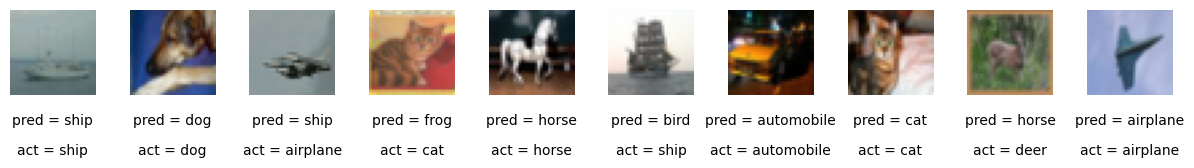

In [36]:

n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, 'pred = ' + str(preds_single[idx]), fontsize=10, ha='center', transform=ax.transAxes) 
    ax.text(0.5, -0.7, 'act = ' + str(actual_single[idx]), fontsize=10, ha='center', transform=ax.transAxes)
    ax.imshow(img)
